In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [2]:
def graphing_training_validation(history):
    acc = history['train_acc']
    val_acc = history['test_acc']
    #loss = history['loss']
    #val_loss = history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Testing acc')
    plt.ylabel('accuracy') 
    plt.xlabel('epoch')
    plt.legend()
    plt.figure()
    """
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('loss') 
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    """

# Loading of the data

Start by loading the data of the metadata and the two extracted features sets

In [3]:
metadata = pd.read_csv("processed_metadata.csv")
metadata.head()

,path,segment,mod,label,samplingrate,ms,samples
0,./Labelled/Bleatings/evt_000_000_000681_210415...,0,0,Bleatings,16000,3000.0,processed_samples/0.wav
1,./Labelled/Bleatings/evt_000_000_000681_210415...,1,0,Bleatings,16000,3000.0,processed_samples/1.wav
2,./Labelled/Bleatings/evt_000_000_000681_210415...,2,0,Bleatings,16000,3000.0,processed_samples/2.wav
3,./Labelled/Bleatings/evt_000_000_000681_210415...,3,0,Bleatings,16000,3000.0,processed_samples/3.wav
4,./Labelled/Bleatings/evt_000_000_000682_210415...,0,0,Bleatings,16000,3000.0,processed_samples/4.wav


In [4]:
d1 = pd.read_csv("mfcc_deltamfcc_stat.csv")
np.shape(d1)

(6944, 130)

In [5]:
d2 = pd.read_csv("mfcc_deltamfcc_entire.csv")
np.shape(d2)

(6944, 2444)

Preapare the data for SVC model by extracting the labels and scaling the features sets

In [6]:
# Transforming non numerical labels into numerical labels
labels = metadata["label"]
encoder = LabelEncoder()

# encoding train labels
y = encoder.fit_transform(labels)

In [7]:
# scale the features
scaler = StandardScaler()

x1 = scaler.fit_transform(d1)
x2 = scaler.fit_transform(d2)

# 10-fold Cross Validation

Start evaluating the two features set using a SVC model setup with a rbf kernel and C=1 using 10 fold cv. The choosen metrics are accuracy and auroc

In [8]:
# set up cross validation procedure
scoring = {'acc': 'accuracy',
           'auroc': 'roc_auc_ovr'}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

In [9]:
scores1 = cross_validate(SVC(probability=True), x1, y, cv=kfold.split(x1, y), scoring=scoring, return_train_score=True)

In [10]:
scores1

{'fit_time': array([10.01808929,  9.79698658,  9.6099999 ,  9.61903048,  9.5300014 ,
         9.73901701,  9.57500458, 10.3310492 ,  9.67604351, 10.04201913]),
 'score_time': array([0.77699089, 0.74898982, 0.74001765, 0.75700092, 0.72799444,
        0.72698259, 0.72600007, 0.74899983, 0.75900197, 0.74397683]),
 'test_acc': array([0.89208633, 0.88776978, 0.88776978, 0.88057554, 0.86743516,
        0.87608069, 0.86455331, 0.88472622, 0.86887608, 0.86599424]),
 'train_acc': array([0.9262282 , 0.92638822, 0.92510802, 0.92318771, 0.92544   ,
        0.92576   , 0.92752   , 0.92768   , 0.92832   , 0.9256    ]),
 'test_auroc': array([0.96791141, 0.97498444, 0.96893358, 0.97199327, 0.96312298,
        0.95870808, 0.96330468, 0.96712254, 0.96356109, 0.96380823]),
 'train_auroc': array([0.98433213, 0.98420151, 0.9844131 , 0.98436414, 0.98499222,
        0.98495026, 0.98469678, 0.98489433, 0.9848985 , 0.9847081 ])}

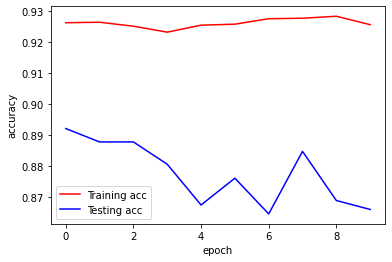

<Figure size 432x288 with 0 Axes>

In [11]:
graphing_training_validation(scores1)

In [31]:
scores1['fit_time'].mean()

9.79372410774231

In [29]:
scores1['train_acc'].mean()

0.926123214594335

In [12]:
scores1['test_acc'].mean()

0.8775867144900793

In [44]:
scores1['train_auroc'].mean()

0.9846451057079155

In [13]:
scores1['test_auroc'].mean()

0.9663450303747319

In [14]:
scores2 = cross_validate(SVC(probability=True), x2, y, cv=kfold.split(x2, y), scoring=scoring, return_train_score=True)

In [15]:
scores2

{'fit_time': array([157.18290925, 159.01350331, 163.79622912, 165.48283696,
        159.88915563, 159.30901742, 159.93200231, 159.62300444,
        163.29301906, 163.02800417]),
 'score_time': array([12.30403566, 11.56298256, 11.88600039, 11.89397812, 11.76600003,
        11.70900154, 11.42701912, 11.16100049, 11.54499865, 11.76800036]),
 'test_acc': array([0.8705036 , 0.8705036 , 0.85035971, 0.83309353, 0.86887608,
        0.85302594, 0.84582133, 0.87175793, 0.84582133, 0.84582133]),
 'train_acc': array([0.9599936 , 0.96159386, 0.96047368, 0.95967355, 0.96208   ,
        0.95984   , 0.9584    , 0.96064   , 0.96368   , 0.96096   ]),
 'test_auroc': array([0.96376713, 0.96520861, 0.95721634, 0.95234527, 0.96397576,
        0.95831065, 0.95691153, 0.96137858, 0.95526762, 0.95842382]),
 'train_auroc': array([0.99600423, 0.99612113, 0.99603919, 0.99598817, 0.99619628,
        0.9960544 , 0.995915  , 0.99595322, 0.99643607, 0.99589095])}

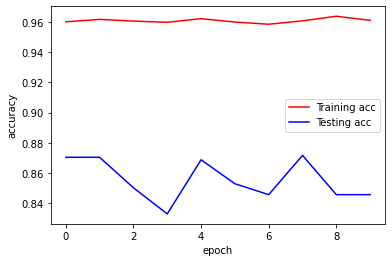

<Figure size 432x288 with 0 Axes>

In [16]:
graphing_training_validation(scores2)

In [32]:
scores2['fit_time'].mean()

161.05496816635133

In [30]:
scores2['train_acc'].mean()

0.9607334677548408

In [17]:
scores2['test_acc'].mean()

0.8555584350963035

In [46]:
scores2['train_auroc'].mean()

0.9960598645488623

In [18]:
scores2['test_auroc'].mean()

0.9592805310688945

The model with condensed feature set perform slightly better with a considerable benefit in training time

# Base classifier

Let's train again the SVC with dataset 1 to collect some classification statistcs

In [19]:
#get train and test data
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=100)

In [20]:
m = SVC()
m.fit(X_train, y_train)

SVC()

In [21]:
Y_pred = m.predict(X_test)
Y_pred

array([2, 1, 1, ..., 1, 2, 0])

In [22]:
print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

print("Training set score for SVM: %f" % m.score(X_train , y_train))
print("Testing  set score for SVM: %f" % m.score(X_test  , y_test ))

m.score

[[372  76   7]
 [ 78 342   4]
 [  6   1 503]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       455
           1       0.82      0.81      0.81       424
           2       0.98      0.99      0.98       510

    accuracy                           0.88      1389
   macro avg       0.87      0.87      0.87      1389
weighted avg       0.88      0.88      0.88      1389

Training set score for SVM: 0.924392
Testing  set score for SVM: 0.876170


<bound method ClassifierMixin.score of SVC()>

# Grid Search

In [23]:
params_grid = [{'kernel': ['rbf'],'C': [0.1, 1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]

In [24]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5, verbose=2)
svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.6s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ...................................C=10, kernel=rbf; total time=   1.3s
[CV] END ...................................C=10

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=2)

In [25]:
svm_model.cv_results_

{'mean_fit_time': array([1.13000741e+00, 8.90011215e-01, 1.04141350e+00, 1.13900166e+00,
        1.14220600e+00, 7.48010159e-01, 2.49920115e+00, 1.96368021e+01,
        1.89738007e+02, 2.03830933e+03]),
 'std_fit_time': array([8.41421356e-03, 8.41892594e-03, 4.31906442e-03, 7.07332054e-03,
        5.71072879e-03, 1.50971643e-02, 2.27482652e-01, 2.23905997e+00,
        3.17618383e+01, 3.00083983e+02]),
 'mean_score_time': array([0.54439025, 0.43159499, 0.40738621, 0.38899484, 0.38499455,
        0.11379366, 0.11099615, 0.10799694, 0.1075954 , 0.10859866]),
 'std_score_time': array([0.00232594, 0.00349997, 0.00205382, 0.00260947, 0.00109615,
        0.005264  , 0.00663178, 0.00521372, 0.00585191, 0.00549776]),
 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf'

<Figure size 432x288 with 0 Axes>

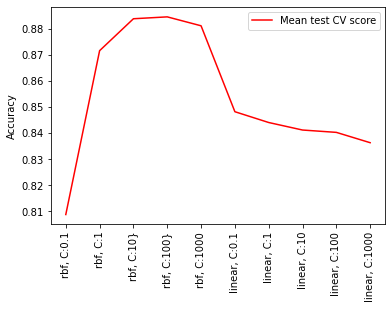

<Figure size 432x288 with 0 Axes>

In [41]:
meanscore = svm_model.cv_results_['mean_test_score']
labels = [
"rbf, C:0.1",
 "rbf, C:1",
 "rbf, C:10}",
 "rbf, C:100}",
 "rbf, C:1000",
 "linear, C:0.1",
 "linear, C:1",
 "linear, C:10",
 "linear, C:100",
 "linear, C:1000"]

plt.plot(labels, meanscore, 'r', label='Mean test CV score')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.figure()

In [42]:
# View the accuracy score
print('Mean cross-validated score of best estimator:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Mean cross-validated score of best estimator: 0.8846084608460846 

Best C: 100 

Best Kernel: rbf 

Best Gamma: scale 



In [27]:
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)

In [28]:
print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train, y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test, y_test ))

final_model.score

[[373  78   4]
 [ 64 358   2]
 [  7   2 501]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       455
           1       0.82      0.84      0.83       424
           2       0.99      0.98      0.99       510

    accuracy                           0.89      1389
   macro avg       0.88      0.88      0.88      1389
weighted avg       0.89      0.89      0.89      1389

Training set score for SVM: 0.998740
Testing  set score for SVM: 0.886969


<bound method ClassifierMixin.score of SVC(C=100)>